In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
ONE_DRIVE_PATH = r"C:\Users\amcar\OneDrive - Danmarks Tekniske Universitet\Shared\2023 Nano Optics Fall\Exercise5_team2"

x10_ag =  np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/10x_ag.txt'))
x10_DBR = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/10X_DBR.txt'))
x10_first = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/10X_first.txt'))
x10_first_1 = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/10X_first_1.txt'))
x10_second = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/10X_second.txt'))

x20_ag = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/20x_ag.txt'))
x20_DBR = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/20X_DBR.txt'))
x20_first = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/20X_first.txt'))
x20_second = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/20X_second.txt'))


x50_ag = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/50x_ag.txt'))
x50_DBR = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/50X_DBR.txt'))
x50_first = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/50X_first.txt'))
x50_second = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/50X_second.txt'))


In [3]:
n_SiO2 = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/Sio2.csv'), skiprows=1, delimiter =',')
n_Al = np.loadtxt(os.path.join(ONE_DRIVE_PATH, 'data/Al.csv'), skiprows=1, delimiter = ',')

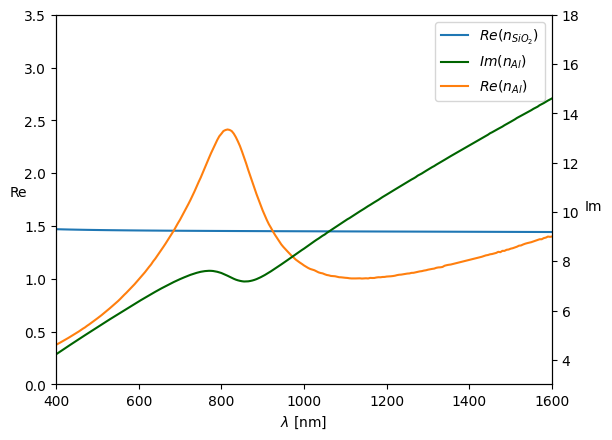

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

lns1 = ax1.plot(n_SiO2[:,0]*1000, n_SiO2[:,1], label="$Re(n_{SiO_2})$")
lns3 = ax1.plot(n_Al[:,0]*1000, n_Al[:,1], label="$Re(n_{Al})$")
lns2 = ax2.plot(n_Al[:,0]*1000, n_Al[:,2], color="darkgreen", label="$Im(n_{Al})$")
plt.xlim(400,1600)
ax1.set_ylim(0, 3.5)
ax2.set_ylim(3, 18)
ax1.set_xlabel("$\lambda$ [nm]")
ax1.set_ylabel("Re", rotation=0)
ax2.set_ylabel("Im", rotation=0, labelpad=10)
lns = lns1+lns2+lns3
labs = [ln.get_label() for ln in lns]
ax1.legend(lns, labs, loc='upper right')
plt.show()

In [6]:
x10_secondx = x10_second[:,0][::2]
x10_secondy = x10_second[:,1][::2]

In [7]:
from scipy import interpolate

ll = np.linspace(500,1300,len(x10_secondx))

e_lim = [500, 1300]
n_SiO2_lmin_idx = np.abs(e_lim[0] - 1000*n_SiO2[:, 0]).argmin()
n_SiO2_lmax_idx = np.abs(e_lim[1] - 1000*n_SiO2[:, 0]).argmin()

n_Al_lmin_idx = np.abs(e_lim[0] - 1000*n_Al[:, 0]).argmin()
n_Al_lmax_idx = np.abs(e_lim[1] - 1000*n_Al[:, 0]).argmin()
n_SiO2[n_SiO2_lmin_idx, 0], n_Al[n_Al_lmin_idx, 0]

(0.5048, 0.5)

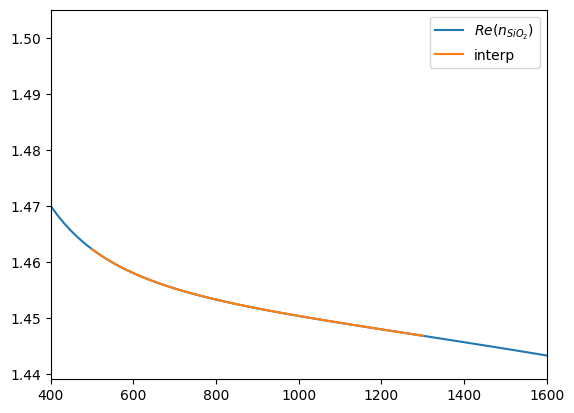

In [8]:
# Polynomial interpolation
n_SiO2_coefficients = np.polyfit(1000*n_SiO2[:,0][n_SiO2_lmin_idx:n_SiO2_lmax_idx], n_SiO2[:,1][n_SiO2_lmin_idx:n_SiO2_lmax_idx], 10)  # Change the polynomial degree if needed
n_SiO2_function = np.poly1d(n_SiO2_coefficients)

# Create 100 points for a smoother plot
n_SiO2_interp = n_SiO2_function(ll)

plt.figure()
plt.plot(n_SiO2[:,0]*1000, n_SiO2[:,1], label="$Re(n_{SiO_2})$")
plt.plot(ll, n_SiO2_interp, label="interp")
plt.xlim(400,1600)
plt.legend()
plt.show()

c:\Users\amcar\Documents\python\python-assignments\venv\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\amcar\Documents\python\python-assignments\venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\amcar\AppData\Local\Temp\ipykernel_26412\2297164909.py:2: RankWarning: Polyfit may be poorly conditioned
  n_AlR_coefficients = np.polyfit(1000*n_Al[:,0][n_Al_lmin_idx:n_Al_lmax_idx], n_Al[:,1][n_Al_lmin_idx:n_Al_lmax_idx], 50)  # Change the polynomial degree if needed
C:\Users\amcar\AppData\Local\Temp\ipykernel_26412\2297164909.py:3: RankWarning: Polyfit may be poorly conditioned
  n_AlI_coefficients = np.polyfit(1000*n_Al[:,0][n_Al_lmin_idx:n_Al_lmax_idx], n_Al[:,2][n_Al_lmin_idx:n_Al_lmax_idx], 20)  # Change the polynomial degree if needed


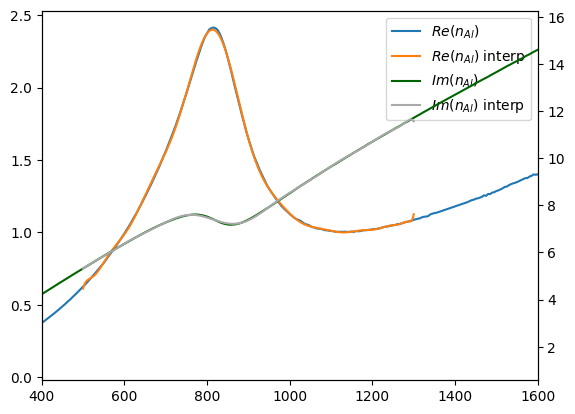

In [9]:
# Polynomial interpolation
n_AlR_coefficients = np.polyfit(1000*n_Al[:,0][n_Al_lmin_idx:n_Al_lmax_idx], n_Al[:,1][n_Al_lmin_idx:n_Al_lmax_idx], 50)  # Change the polynomial degree if needed
n_AlI_coefficients = np.polyfit(1000*n_Al[:,0][n_Al_lmin_idx:n_Al_lmax_idx], n_Al[:,2][n_Al_lmin_idx:n_Al_lmax_idx], 20)  # Change the polynomial degree if needed
n_AlR_function = np.poly1d(n_AlR_coefficients)
n_AlI_function = np.poly1d(n_AlI_coefficients)

# Create 100 points for a smoother plot
n_AlR_interp = n_AlR_function(ll)
n_AlI_interp = n_AlI_function(ll)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lns1 = ax1.plot(n_Al[:,0]*1000, n_Al[:,1], label="$Re(n_{Al})$")
lns2 = ax1.plot(ll, n_AlR_interp, label="$Re(n_{Al})$ interp")
lns3 = ax2.plot(n_Al[:,0]*1000, n_Al[:,2], color="darkgreen", label="$Im(n_{Al})$")
lns4 = ax2.plot(ll, n_AlI_interp, color="darkgray", label="$Im(n_{Al})$ interp")
plt.xlim(400,1600)
lns = lns1+lns2+lns3+lns4
labs = [ln.get_label() for ln in lns]
ax1.legend(lns, labs, loc='upper right')
plt.show()

In [10]:
def T(n1,n2):
    return 1/(2*n2) * np.array([[n2+n1,n2-n1], [n2-n1,n2+n1]])

def TL(n,k0,L):
    return np.array([[np.exp(1j*n*k0*L),0], [0,np.exp(-1j*n*k0*L)]])

In [25]:
#nn_Al = 13.571
#nn_SiO2 = 1.1596

L_AL1 = 30
L_AL2 = 10
#L_SiO2 = 780
L_SiO2 = 600

In [96]:
Transmission_list =[]
Reflection_list = []

for l in ll: 
    k0 = 2*np.pi/l
    index = np.where(ll == l)[0][0]
    T_AL_layer1 = TL((n_AlR_interp[index]+1j*n_AlI_interp[index]),k0,L_AL1)
    T_Al_to_SiO2 =  T((n_AlR_interp[index] + 1j*n_AlI_interp[index]),n_SiO2_interp[index])
    T_SiO2_layer1 = TL(n_SiO2_interp[index],k0,L_SiO2)
    T_SiO2_to_Al = T(n_SiO2_interp[index],(n_AlR_interp[index] + 1j*n_AlI_interp[index]))
    T_Al_layer2 = TL((n_AlR_interp[index] + 1j*n_AlI_interp[index]),k0,L_AL2)
    T_list = [T_AL_layer1, T_Al_to_SiO2, T_SiO2_layer1, T_SiO2_to_Al, T_Al_layer2]
    result = np.array([[1,0],[0,1]])
    for x in T_list:
        result = x @ result 

    Reflection = abs(result[0][1]/result[1][1])**2
    Transmission = abs(result[0][0] - result[0][1]*result[1][0]/ result[1][1])**2
    Reflection_list.append(Reflection)
    Transmission_list.append(Transmission)

In [11]:
T = lambda n1, n2 : 1/(2*n2) * np.array([[n2 + n1, n2 - n1], [n2 - n1, n2 + n1]])
TL = lambda n,k0,L: np.array([[np.exp(1j*n*k0*L), 0], [0, np.exp(-1j*n*k0*L)]])

def Rtot(ll, L_AL1, L_AL2, L_SiO2):
    Rtot = np.zeros(len(ll))
    for idx, l in enumerate(ll):
        k0 = 2*np.pi/l
        Al_n = n_AlR_interp[idx] + 1j*n_AlI_interp[idx]
        SiO2_n = n_SiO2_interp[idx]
        Tt = TL(Al_n, k0, L_AL2) @ T(SiO2_n, Al_n) @ TL(SiO2_n, k0, L_SiO2) @ T(Al_n, SiO2_n) @ TL(Al_n, k0, L_AL1)
        Rtot[idx] = np.abs(np.divide(Tt[1][0], Tt[1][1]))**2
        
    return Rtot


params = [  10, 30, 600 ]
bounds = (
    [0, 0, 0],
    [np.inf, np.inf, np.inf]
)

params, pcov = curve_fit(Rtot, ll, x10_secondy, p0=params, bounds=bounds, maxfev=10000, nan_policy='omit')


C:\Users\amcar\AppData\Local\Temp\ipykernel_26412\371817582.py:2: RuntimeWarning: overflow encountered in exp
  TL = lambda n,k0,L: np.array([[np.exp(1j*n*k0*L), 0], [0, np.exp(-1j*n*k0*L)]])
C:\Users\amcar\AppData\Local\Temp\ipykernel_26412\371817582.py:10: RuntimeWarning: invalid value encountered in matmul
  Tt = TL(Al_n, k0, L_AL2) @ T(SiO2_n, Al_n) @ TL(SiO2_n, k0, L_SiO2) @ T(Al_n, SiO2_n) @ TL(Al_n, k0, L_AL1)
C:\Users\amcar\AppData\Local\Temp\ipykernel_26412\371817582.py:11: RuntimeWarning: invalid value encountered in divide
  Rtot[idx] = np.abs(np.divide(Tt[1][0], Tt[1][1]))**2
C:\Users\amcar\AppData\Local\Temp\ipykernel_26412\371817582.py:10: RuntimeWarning: overflow encountered in matmul
  Tt = TL(Al_n, k0, L_AL2) @ T(SiO2_n, Al_n) @ TL(SiO2_n, k0, L_SiO2) @ T(Al_n, SiO2_n) @ TL(Al_n, k0, L_AL1)
C:\Users\amcar\AppData\Local\Temp\ipykernel_26412\371817582.py:11: RuntimeWarning: overflow encountered in divide
  Rtot[idx] = np.abs(np.divide(Tt[1][0], Tt[1][1]))**2


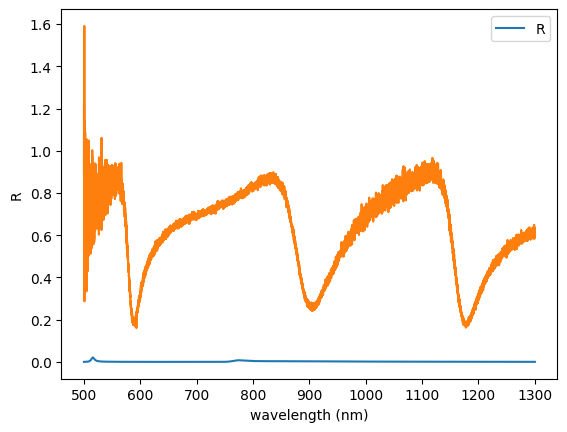

In [19]:
fitR = np.array(Rtot(ll, 30, 10, 500))

plt.figure()
plt.plot(ll, fitR, label = 'R')
plt.plot(x10_secondx, x10_secondy/x10_ag[:,1][::2])
plt.xlabel('wavelength (nm)')
plt.ylabel('R')
#plt.ylim(0,1)
plt.legend()

In [ ]:
Rtot = []
Ttot = []
for l in ll:
    k0 = 2*np.pi/l
    T = lambda n1, n2 : 1/(2*n2) * np.array([[n2 + n1, n2 - n1], [n2 - n1, n2 + n1]])
    TL = lambda L, n: np.array([[np.exp(1j*n*k0*L), 0], [0, np.exp(-1j*n*k0*L)]])

    # build the unit transfer matrix
    Tunit = (np.matmul(np.matmul(np.matmul(TL(L2, n2), T(n1, n2)), TL(L1, n1)), T(n2, n1)))

    Tt = np.identity(len(Tunit))
    for i in range(N):
        Tt = np.matmul(Tt, Tunit)

    Rtot.append(np.abs(np.divide(Tt[0][1], Tt[1][1]))**2)
    Ttot.append(np.absolute(Tt[0][0] - np.divide((Tt[0][1] * Tt[1][0]), Tt[1][1]))**2)

Rtot = np.array(Rtot)
Ttot = np.array(Ttot)

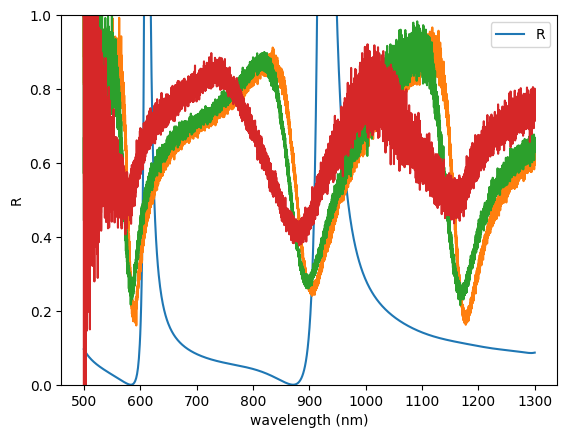

In [97]:
plt.plot(ll,np.array(Reflection_list), label = 'R')
plt.plot(x10_ag[:,0], x10_second[:,1]/x10_ag[:,1])
plt.plot(x10_ag[:,0], x20_second[:,1]/x20_ag[:,1])
plt.plot(x10_ag[:,0], x50_second[:,1]/x50_ag[:,1])
plt.xlabel('wavelength (nm)')
plt.ylabel('R')
plt.ylim(0,1)
plt.legend()

In [350]:
n2 = 2.9
n1 = 3.5
L_DBR_1 = 66.4
L_DBR_2 = 79.8
LLC = 300

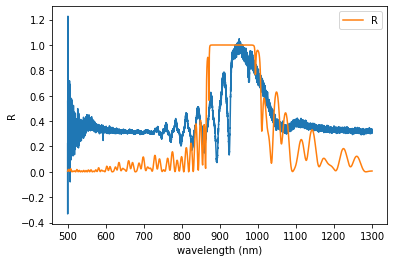

In [351]:
Transmission_list =[]
Reflection_list = []
ll = np.linspace(500,1300,1000)
NLP = 50
T12 = T(n1,n2)
T21 = T(n2,n1)
for l in ll: 
    k0 = 2*np.pi/l
    n = 0
    T_list = []
    while n < NLP:
        if n != 35:
            TL2 = TL(n2,k0,L_DBR_2)
            TL1 = TL(n1,k0,L_DBR_1)
            T_list.append(T12)
            T_list.append(TL2)
            T_list.append(T21)
            T_list.append(TL1)
        else:
            TL2 = TL(n2,k0,L_DBR_2)
            TLC = TL(n1,k0,LLC)
            T_list.append(T12)
            T_list.append(TL2)
            T_list.append(T21)
            T_list.append(TLC)
        n+=1
    result = np.array([[1,0],[0,1]])
    for x in T_list:
        result = x @ result 

    Reflection = abs(-result[1][0]/result[1][1])**2
    Transmission = abs(result[0][0] - result[0][1]*result[1][0]/ result[1][1])**2
    Reflection_list.append(Reflection)
    Transmission_list.append(Transmission)

plt.plot(x10_ag[:,0], (x10_DBR[:,1]/x10_ag[:,1]))
plt.plot(ll,Reflection_list, label = 'R')

plt.xlabel('wavelength (nm)')
plt.ylabel('R')
#plt.ylim(0,3)
plt.legend()